In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file="./russia_losses_personnel.csv"
df=pd.read_csv(file)
df=df.dropna(axis=0)

In [3]:
df.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [6]:
X=df["day"]
y=df["personnel"]

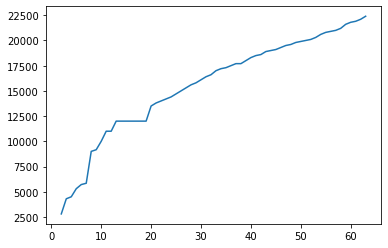

In [7]:
plt.plot(df["day"],df["personnel"])

# Data Preprocessing imports

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,jaccard_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_arr=np.array(df["day"])
y_arr=np.array(df["personnel"])

In [10]:
type(X)

pandas.core.series.Series

In [11]:
X.shape

(62,)

In [12]:
y.shape

(62,)

In [13]:
X_shaped=X_arr.reshape(-1,1)
y_shaped=y_arr.reshape(-1,1)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_shaped,y_shaped,test_size=0.5,train_size=0.2,random_state=9,shuffle=True)


In [15]:
# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# y_train=scaler.fit_transform(y_train)

In [16]:
X_train.shape

(12, 1)

In [17]:
X_shaped.shape

(62, 1)

In [22]:
regr=LinearRegression()
regr.fit(X_train,y_train)
regr.score(X_train,y_train)

# regr.fit(X_shaped,y_shaped)

# predictionx=regr.predict(X_shaped)
# predictiony=regr.predict(y_shaped)

0.989329595405948

In [23]:
regr.score(X_test,y_test)

0.85934545063387

In [24]:
predriction=pd.DataFrame([[32],[40],[75],[100],[300],[365],[400]],columns=["day"])
# predrictiony=pd.DataFrame([[357],[365],[400]],columns=["day"])

In [25]:
print(f"coeffcient:{regr.coef_}")

coeffcient:[[218.51227888]]


In [68]:
results=regr.predict(predriction)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [73]:
frameresult=pd.DataFrame(results,columns=["losses Russian Soldiers"])
framepred=pd.DataFrame(predriction)


In [75]:
ResulFrame=pd.concat([framepred,frameresult],axis=1)

In [79]:
df_res=ResulFrame

In [86]:
df_res["day"].shape

(7,)

In [82]:
for i in df_res["losses Russian Soldiers"] :
#     print(f"{round(i[0],0)}")
    print(i)
# print(predriction)    

15890.72982137843
17638.828052441735
25286.7578133437
30749.56478541653
74452.02056199916
88655.31868938853
96303.24845029048


In [77]:
# LR_accuracy_score=accuracy_score(predictionx,y_shaped)

In [78]:
y_reshaped_pred=results.reshape(-1,1)

<AxesSubplot:title={'center':'UKraine War 2022'}, xlabel='War Days', ylabel='Russian Soldiers Losses'>

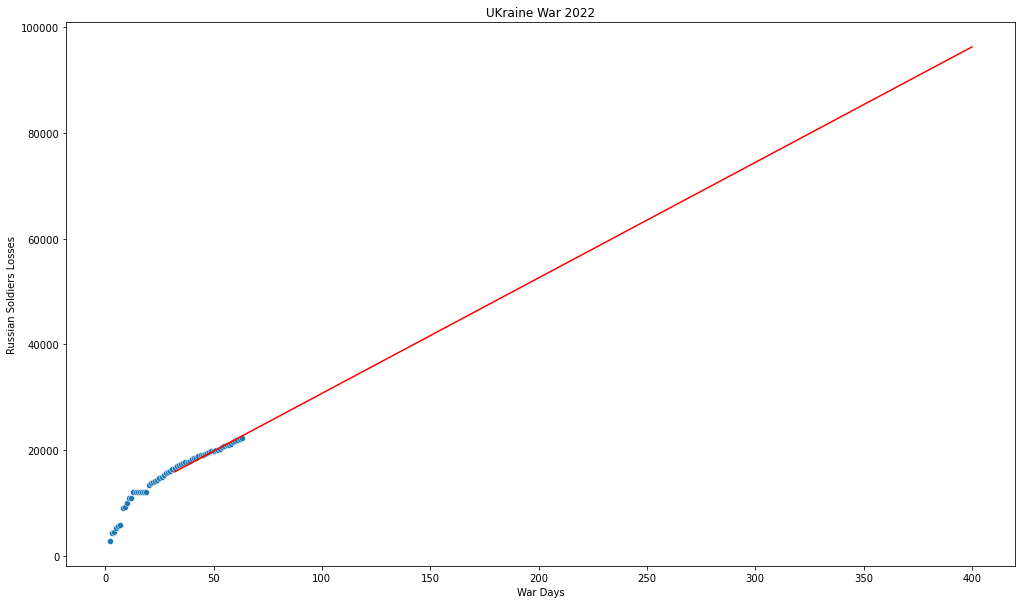

In [90]:
plt.figure(figsize=(17,10))
plt.title("UKraine War 2022")
plt.xlabel("War Days")
plt.ylabel("Russian Soldiers Losses")
ax=sns.lineplot(x=df_res["day"],y=df_res["losses Russian Soldiers"],color='red')
# plt.xlim(0,400)
# plt.ylim(0,100000)
sns.scatterplot(x="day",y="personnel",data=df,ax=ax)
# plt.scatter(X,y,alpha=0.4,c="y")

# Tensorflow Imports

In [45]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Softmax,Flatten

In [46]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=True,
    name='Adam')

In [50]:
model=Sequential()
model.add(Dense(24,activation="tanh"))
model.add(Dense(18,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(14,activation="sigmoid"))
model.add(Dense(18,activation="relu"))

model.compile(optimizer="rmsprop",loss="mse",metrics=["accuracy"])

In [51]:
model.fit(X_train,y_train,
          
          batch_size=128,epochs=400) ##batchsize auf 128 setzen
%time

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 256022400.0000 - accuracy: 0.0000e+00
Epoch 2/400
1/1 [==============================] - 0s 8ms/step - loss: 256021872.0000 - accuracy: 0.0000e+00
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 256021440.0000 - accuracy: 0.0000e+00
Epoch 4/400
1/1 [==============================] - 0s 5ms/step - loss: 256021104.0000 - accuracy: 0.0000e+00
Epoch 5/400
1/1 [==============================] - 0s 7ms/step - loss: 256020784.0000 - accuracy: 0.0000e+00
Epoch 6/400
1/1 [==============================] - 0s 7ms/step - loss: 256020432.0000 - accuracy: 0.0000e+00
Epoch 7/400
1/1 [==============================] - 0s 7ms/step - loss: 256020096.0000 - accuracy: 0.0000e+00
Epoch 8/400
1/1 [==============================] - 0s 42ms/step - loss: 256019776.0000 - accuracy: 0.0000e+00
Epoch 9/400
1/1 [==============================] - 0s 7ms/step - loss: 256019472.0000 - accuracy: 0.0000e+00
Epoch 10/400
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 255995904.0000 - accuracy: 0.0000e+00
Epoch 76/400
1/1 [==============================] - 0s 5ms/step - loss: 255995520.0000 - accuracy: 0.0000e+00
Epoch 77/400
1/1 [==============================] - 0s 9ms/step - loss: 255995184.0000 - accuracy: 0.0000e+00
Epoch 78/400
1/1 [==============================] - 0s 10ms/step - loss: 255994768.0000 - accuracy: 0.0000e+00
Epoch 79/400
1/1 [==============================] - 0s 5ms/step - loss: 255994416.0000 - accuracy: 0.0000e+00
Epoch 80/400
1/1 [==============================] - 0s 8ms/step - loss: 255994032.0000 - accuracy: 0.0000e+00
Epoch 81/400
1/1 [==============================] - 0s 5ms/step - loss: 255993680.0000 - accuracy: 0.0000e+00
Epoch 82/400
1/1 [==============================] - 0s 22ms/step - loss: 255993296.0000 - accuracy: 0.0000e+00
Epoch 83/400
1/1 [==============================] - 0s 8ms/step - loss: 255992944.0000 - accuracy: 0.0000e+00
Epoch 84/400
1/1 [==

Epoch 149/400
1/1 [==============================] - 0s 49ms/step - loss: 255971664.0000 - accuracy: 0.0000e+00
Epoch 150/400
1/1 [==============================] - 0s 5ms/step - loss: 255971376.0000 - accuracy: 0.0000e+00
Epoch 151/400
1/1 [==============================] - 0s 7ms/step - loss: 255971072.0000 - accuracy: 0.0000e+00
Epoch 152/400
1/1 [==============================] - 0s 9ms/step - loss: 255970736.0000 - accuracy: 0.0000e+00
Epoch 153/400
1/1 [==============================] - 0s 10ms/step - loss: 255970432.0000 - accuracy: 0.0000e+00
Epoch 154/400
1/1 [==============================] - 0s 6ms/step - loss: 255970112.0000 - accuracy: 0.0000e+00
Epoch 155/400
1/1 [==============================] - 0s 9ms/step - loss: 255969792.0000 - accuracy: 0.0000e+00
Epoch 156/400
1/1 [==============================] - 0s 15ms/step - loss: 255969488.0000 - accuracy: 0.0000e+00
Epoch 157/400
1/1 [==============================] - 0s 7ms/step - loss: 255969152.0000 - accuracy: 0.0000e+0

1/1 [==============================] - 0s 7ms/step - loss: 255949488.0000 - accuracy: 0.0000e+00
Epoch 223/400
1/1 [==============================] - 0s 4ms/step - loss: 255949200.0000 - accuracy: 0.0000e+00
Epoch 224/400
1/1 [==============================] - 0s 9ms/step - loss: 255948928.0000 - accuracy: 0.0000e+00
Epoch 225/400
1/1 [==============================] - 0s 20ms/step - loss: 255948624.0000 - accuracy: 0.0000e+00
Epoch 226/400
1/1 [==============================] - 0s 4ms/step - loss: 255948336.0000 - accuracy: 0.0000e+00
Epoch 227/400
1/1 [==============================] - 0s 7ms/step - loss: 255948032.0000 - accuracy: 0.0000e+00
Epoch 228/400
1/1 [==============================] - 0s 6ms/step - loss: 255947728.0000 - accuracy: 0.0000e+00
Epoch 229/400
1/1 [==============================] - 0s 8ms/step - loss: 255947472.0000 - accuracy: 0.0000e+00
Epoch 230/400
1/1 [==============================] - 0s 5ms/step - loss: 255947152.0000 - accuracy: 0.0000e+00
Epoch 231/400


1/1 [==============================] - 0s 9ms/step - loss: 255928320.0000 - accuracy: 0.0000e+00
Epoch 296/400
1/1 [==============================] - 0s 5ms/step - loss: 255928048.0000 - accuracy: 0.0000e+00
Epoch 297/400
1/1 [==============================] - 0s 6ms/step - loss: 255927760.0000 - accuracy: 0.0000e+00
Epoch 298/400
1/1 [==============================] - 0s 8ms/step - loss: 255927472.0000 - accuracy: 0.0000e+00
Epoch 299/400
1/1 [==============================] - 0s 7ms/step - loss: 255927168.0000 - accuracy: 0.0000e+00
Epoch 300/400
1/1 [==============================] - 0s 6ms/step - loss: 255926896.0000 - accuracy: 0.0000e+00
Epoch 301/400
1/1 [==============================] - 0s 9ms/step - loss: 255926608.0000 - accuracy: 0.0000e+00
Epoch 302/400
1/1 [==============================] - 0s 9ms/step - loss: 255926320.0000 - accuracy: 0.0000e+00
Epoch 303/400
1/1 [==============================] - 0s 5ms/step - loss: 255926016.0000 - accuracy: 0.0000e+00
Epoch 304/400
1

1/1 [==============================] - 0s 5ms/step - loss: 255907216.0000 - accuracy: 0.0000e+00
Epoch 369/400
1/1 [==============================] - 0s 8ms/step - loss: 255906944.0000 - accuracy: 0.0000e+00
Epoch 370/400
1/1 [==============================] - 0s 9ms/step - loss: 255906640.0000 - accuracy: 0.0000e+00
Epoch 371/400
1/1 [==============================] - 0s 7ms/step - loss: 255906352.0000 - accuracy: 0.0000e+00
Epoch 372/400
1/1 [==============================] - 0s 64ms/step - loss: 255906048.0000 - accuracy: 0.0000e+00
Epoch 373/400
1/1 [==============================] - 0s 5ms/step - loss: 255905744.0000 - accuracy: 0.0000e+00
Epoch 374/400
1/1 [==============================] - 0s 7ms/step - loss: 255905488.0000 - accuracy: 0.0000e+00
Epoch 375/400
1/1 [==============================] - 0s 6ms/step - loss: 255905168.0000 - accuracy: 0.0000e+00
Epoch 376/400
1/1 [==============================] - 0s 6ms/step - loss: 255904896.0000 - accuracy: 0.0000e+00
Epoch 377/400


In [40]:
eval=model.evaluate(X_train,y_train)

1/1 [==============================] - 0s 26ms/step - loss: 255997056.0000


In [33]:
print(eval)

255999440.0


In [34]:
losses=pd.DataFrame(model.history.history)

In [35]:
losses.plot()

TypeError: no numeric data to plot

In [38]:
model.predict([[300]])

1/1 [==============================] - 0s 116ms/step


array([[2.333359e-38, 9.999995e-01, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.410220e-16, 1.000000e+00]], dtype=float32)

1/1 [==============================] - 0s 24ms/step


ValueError: x and y must be the same size

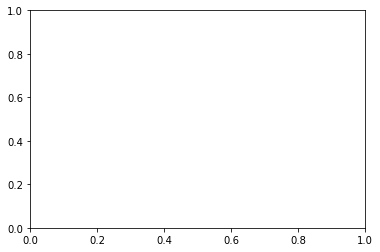

In [37]:
plt.scatter(X_train,model.predict(X_train),alpha=0.5,linewidths=5,c="r")